![](https://www.visiondummy.com/wp-content/uploads/2014/04/curseofdimensionality.png)

![](https://www.visiondummy.com/wp-content/uploads/2014/04/sparseness.png)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = r'breast-cancer-wisconsin.data.txt'

In [3]:
df = pd.read_csv(data, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [6]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df.drop('Id', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [9]:
for var in df.columns:
    print(df[var].value_counts())

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

In [10]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [11]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [12]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [13]:
df['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [14]:
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [15]:
df['Bare_Nuclei'].isna().sum()

np.int64(16)

In [16]:
df.Class.value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [17]:
df.Class.value_counts()/len(df)

Class
2    0.655222
4    0.344778
Name: count, dtype: float64

In [18]:
print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

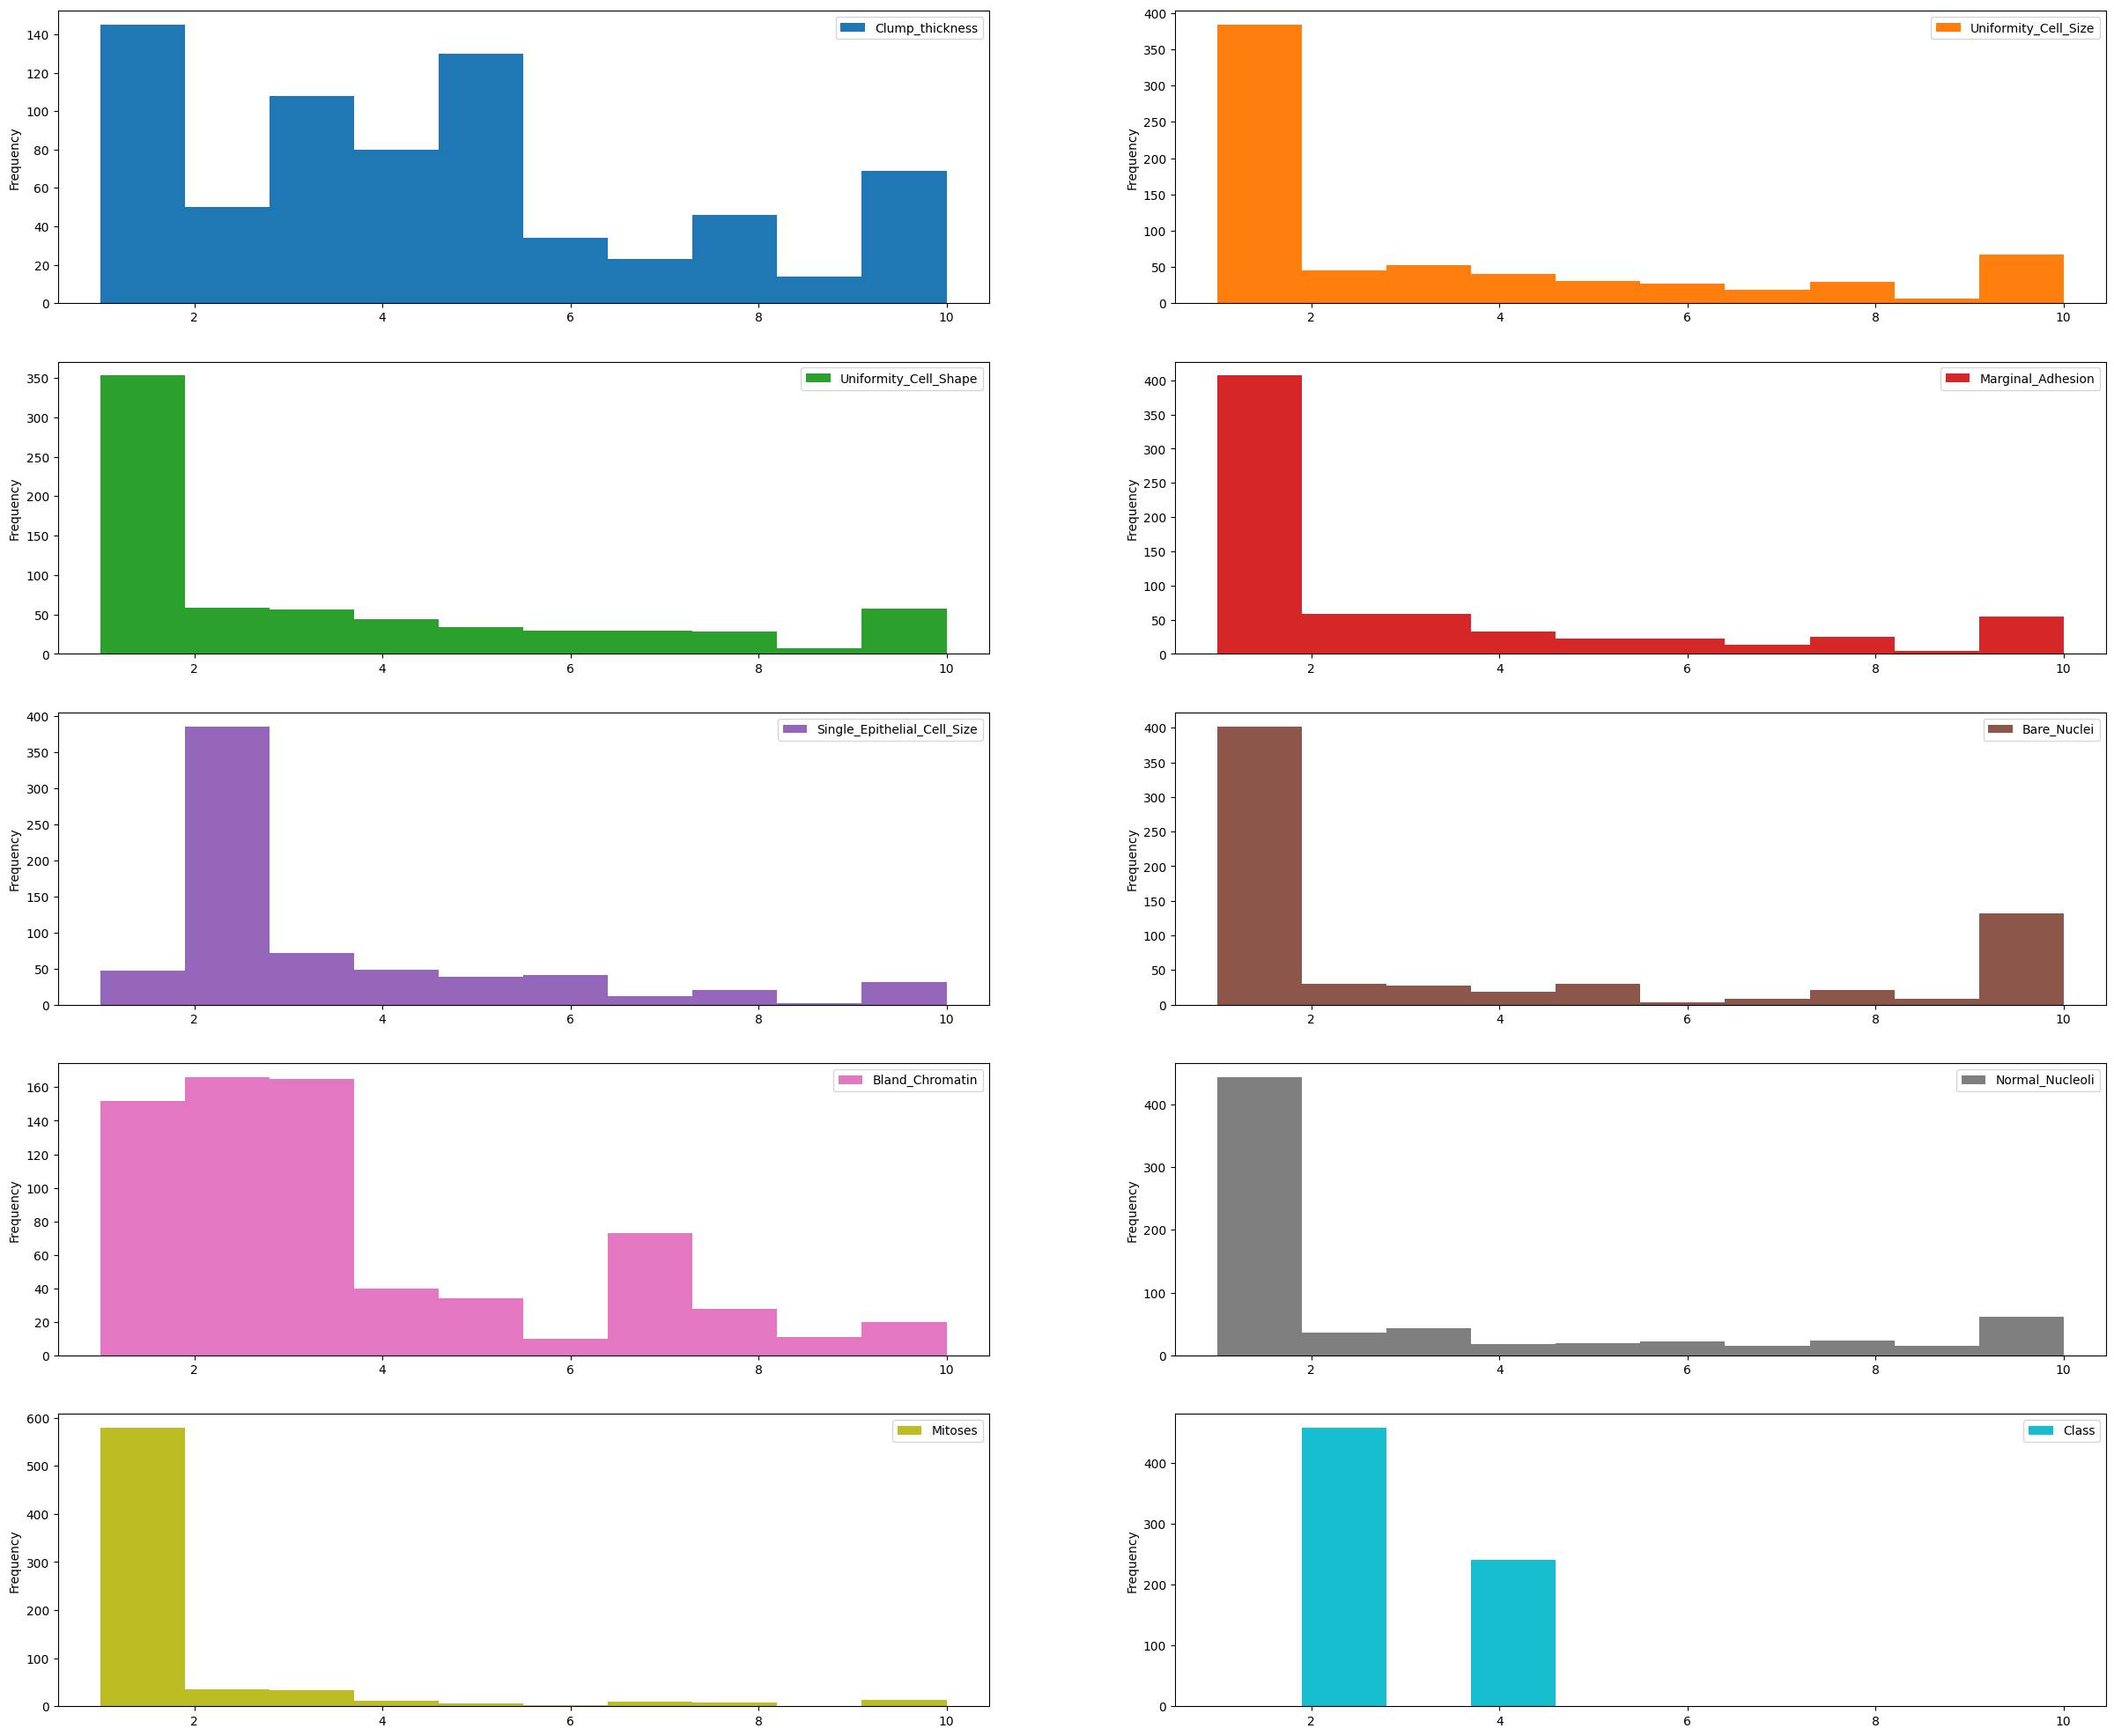

In [21]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

In [22]:
correlation = df.corr()

In [23]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

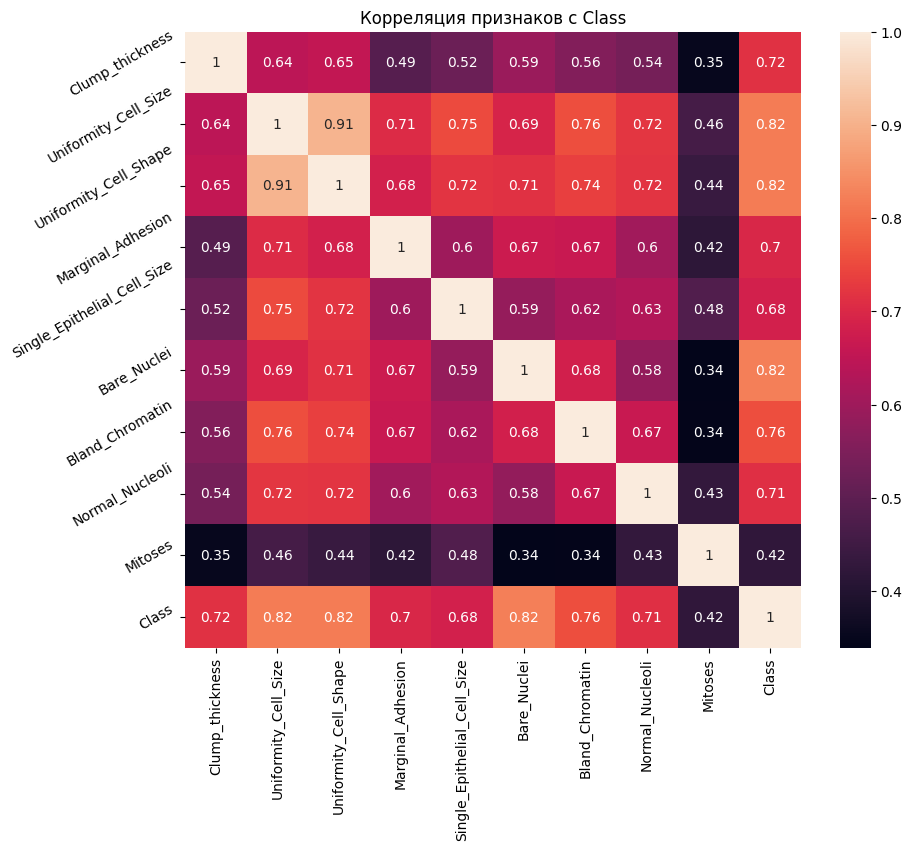

In [25]:
plt.figure(figsize=(10, 8))
plt.title("Корреляция признаков с Class")
a = sns.heatmap(correlation, square=True, annot=True)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape

((559, 9), (140, 9))

In [39]:
X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

In [40]:
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    11
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [41]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    5
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [42]:
for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Bare_Nuclei 0.01967799642218247


In [43]:
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

C:\Users\AZubochenko\AppData\Local\Temp\ipykernel_24732\2881082306.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(col_median, inplace=True)
C:\Users\AZubochenko\AppData\Local\Temp\ipykernel_24732\2881082306.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [44]:
X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [45]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [47]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
82,5,2,1,1,2,1.0,3,1,1
51,5,3,3,4,2,4.0,3,4,1
220,1,1,1,2,2,1.0,3,1,1
559,5,1,1,1,2,1.0,2,1,1
544,2,1,3,2,2,1.0,2,1,1


In [48]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
158,1,1,2,1,3,1.0,1,1,1
499,4,1,1,1,2,1.0,2,1,1
396,3,1,1,1,2,1.0,3,1,1
155,5,5,5,6,3,10.0,3,1,1
321,3,1,1,1,2,1.0,3,1,1


In [46]:
cols = X_train.columns

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [52]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.164886,-0.383175,-0.760698,-0.642507,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724
1,0.164886,-0.054655,-0.096276,0.405629,-0.554964,0.113334,-0.183205,0.392303,-0.349724
2,-1.236959,-0.711694,-0.760698,-0.293128,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724
3,0.164886,-0.711694,-0.760698,-0.642507,-0.554964,-0.698893,-0.586401,-0.601492,-0.349724
4,-0.886498,-0.711694,-0.096276,-0.293128,-0.554964,-0.698893,-0.586401,-0.601492,-0.349724


In [53]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-1.236959,-0.711694,-0.428487,-0.642507,-0.113048,-0.698893,-0.989597,-0.601492,-0.349724
1,-0.185575,-0.711694,-0.760698,-0.642507,-0.554964,-0.698893,-0.586401,-0.601492,-0.349724
2,-0.536036,-0.711694,-0.760698,-0.642507,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724
3,0.164886,0.602383,0.568146,1.104387,-0.113048,1.737788,-0.183205,-0.601492,-0.349724
4,-0.536036,-0.711694,-0.760698,-0.642507,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724


In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [55]:
y_pred = knn.predict(X_test)

y_pred

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2])

In [57]:
knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.33333333, 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.66666667,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.33333333, 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.66666667,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 1.     

In [58]:
knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.66666667, 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.33333333,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.66666667, 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.33333333,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.     

In [60]:
from sklearn.metrics import accuracy_score

print("Model accuracy score:", accuracy_score(y_test, y_pred))

Model accuracy score: 0.9714285714285714


In [61]:
y_pred_train = knn.predict(X_train)

In [62]:
accuracy_score(y_train, y_pred_train)

0.9803220035778175

In [64]:
knn.score(X_train, y_train)


0.9803220035778175

In [65]:
knn.score(X_test, y_test)

0.9714285714285714

In [66]:
y_test.value_counts()

Class
2    95
4    45
Name: count, dtype: int64

In [68]:
null_accuracy = 95/(95+45)
print(null_accuracy)

0.6785714285714286


In [69]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)
print(accuracy_score(y_test, y_pred_5))

0.9714285714285714


In [70]:
knn_6 = KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train, y_train)
y_pred_6 = knn_6.predict(X_test)
print(accuracy_score(y_test, y_pred_6))

0.9571428571428572


In [71]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
y_pred_7 = knn_7.predict(X_test)
print(accuracy_score(y_test, y_pred_7))

0.9714285714285714


In [72]:
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(X_train, y_train)
y_pred_8 = knn_8.predict(X_test)
print(accuracy_score(y_test, y_pred_8))

0.9714285714285714


In [73]:
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train, y_train)
y_pred_9 = knn_9.predict(X_test)
print(accuracy_score(y_test, y_pred_9))

0.9714285714285714


In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [83]:
cm

array([[94,  1],
       [ 3, 42]])

In [76]:
print("TP", cm[0,0])
print("FP", cm[0,1])
print("TN", cm[1,1])
print("FN", cm[1,0])

TP 94
FP 1
TN 42
FN 3


In [81]:
cm = confusion_matrix(y_test, y_pred_9)
print("TP", cm[0,0])
print("FP", cm[0,1])
print("TN", cm[1,1])
print("FN", cm[1,0])

TP 94
FP 1
TN 42
FN 3


<Axes: >

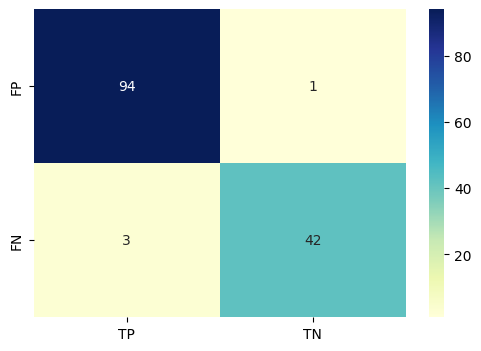

In [85]:
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm, columns=['TP', 'TN'] , index=['FP', 'FN'])
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu')

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



In [88]:
TP =  cm[0,0]
FP = cm[0,1]
TN = cm[1,1]
FN = cm[1,0]

In [91]:
classification_accuracy = (TP+TN) / (TP+TN+FP+FN)
classification_accuracy

np.float64(0.9714285714285714)

In [92]:
precision = TP / (TP+FP)
precision

np.float64(0.9894736842105263)

In [93]:
recall = TP / (TP+FN)
recall

np.float64(0.9690721649484536)

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



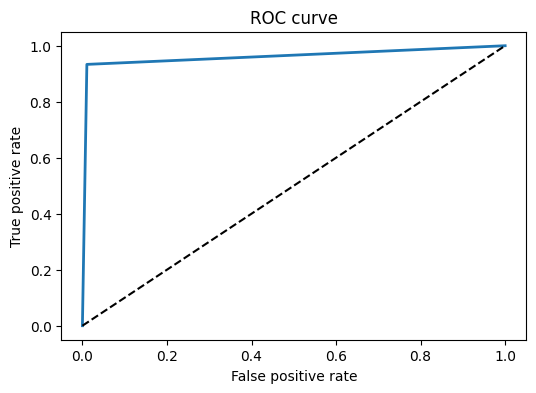

In [97]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC curve")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [98]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)
print(ROC_AUC)

0.9614035087719298


In [101]:
from sklearn.model_selection import cross_val_score

cross_validation_score = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc')
print(cross_validation_score)
print(cross_validation_score.mean())


[0.98823323 0.98946259 0.98331577 0.99809028 0.95886752]
0.9835938780587753
